# Multi-Sensor Image fusion 

The goal of image fusion is to obtain a fused image that contains most significant information in all input images which
were captured by different sensors from the same scene. In particular,
the fusion process should improve the contrast and keep the
integrity of significant features from input images.In this project
multi-sensor image fusion is used to combine the complementary
information of source images from the multiple sensors.


## Data Description

The dataset contains multi-sensor images i.e infrared and
visible image.

There are total 30 images in folder(IV images)
, where 15 images are infrared and remaining 15 are visible.

## Importing packages 


In [1]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
from imageio import imread
from imageio import imsave
from scipy import linalg as la
import cv2 
from math import log10, sqrt

G:\anaconda\envs\pytorch1\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Visualising input image

In [2]:
def input_visual_VIS(image):
        gray_img = imread(image) #reading image
        gray_img= cv2.cvtColor(gray_img, cv2.COLOR_BGR2RGB) # Adjusting color channels
        gray_img = cv2.cvtColor(gray_img, cv2.COLOR_BGR2GRAY) # changing the color channel from RGB to gray 
        return gray_img
def input_visual_VIS(image):
        ir_img = imread(image)
        ir_img = cv2.cvtColor(ir_img, cv2.COLOR_BGR2RGB) # Adjusting color channels
        ir_img = cv2.cvtColor(ir_img, cv2.COLOR_BGR2GRAY) # changing the color channel from RGB to gray 
        return  ir_img

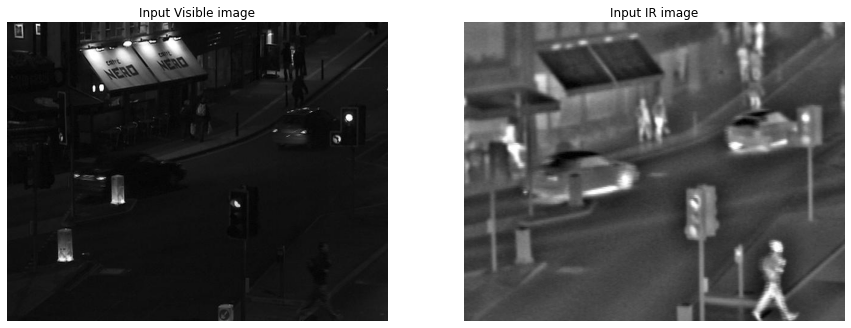

In [3]:
plt.figure(1,figsize=(15,8))
plt.subplot(1, 2, 1)
img1 = input_visual_VIS('IV_images/VIS2.png')
plt.title("Input Visible image")
plt.axis('off')
plt.imshow(img1,cmap="gray")
plt.subplot(1, 2, 2)
img2 = input_visual_VIS('IV_images/IR2.png')
plt.title("Input IR image")
plt.axis('off')
plt.imshow(img2,cmap="gray")

## Principal Component Analysis

In [4]:
def Fusion_PCA(image1, image2):
    # Converting Image data to numpy Array to be able to do necessary calculation
    a = np.array(image1)
    b = np.array(image2)
    # getting Image dimensions
    temp1 = a.shape
    temp2 = b.shape
    # Starting PCA algorithm
    # creating matrix with both Images
    vector1 = np.reshape(a, temp1[0] * temp1[1], order='F')
    vector2 = np.reshape(b, temp2[0] * temp2[1], order='F')
    #  creating covariance matrix
    c = np.cov(vector1, vector2)
    # getting Eigenvalue and Eigenvector of this matrix
    d, v = la.eig(c)
    sum1 = np.sum(v, axis=0)
    # Calculating PCA
    if d[0] >= d[1]:
        pca = np.divide(v[:, 0], sum1[0])
    else:
        pca = np.divide(v[:, 1], sum1[1])
    # Creating fused image
    result = (pca[0] * image1) + (pca[1] * image2)
    return result


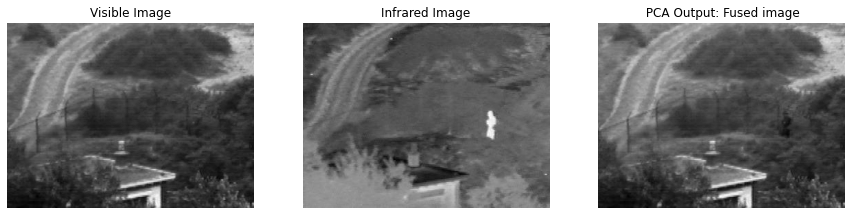

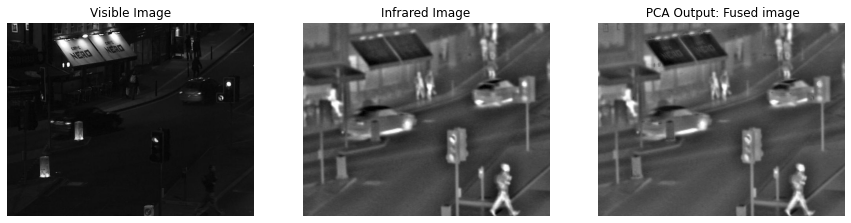

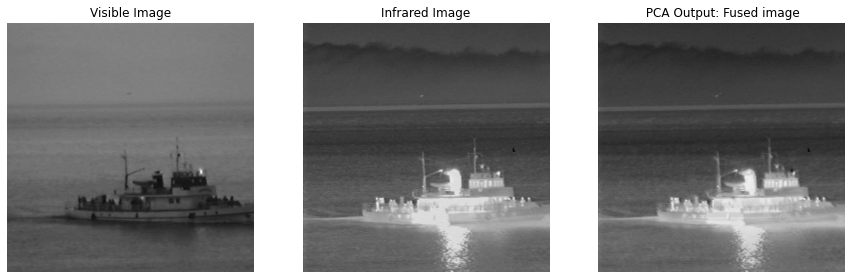

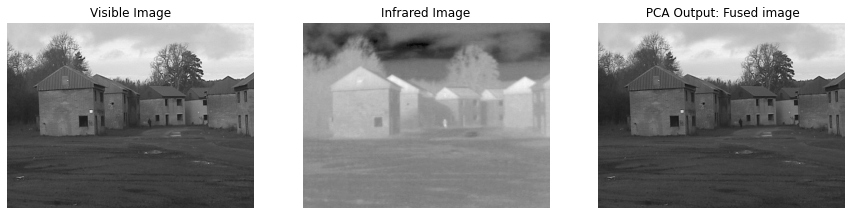

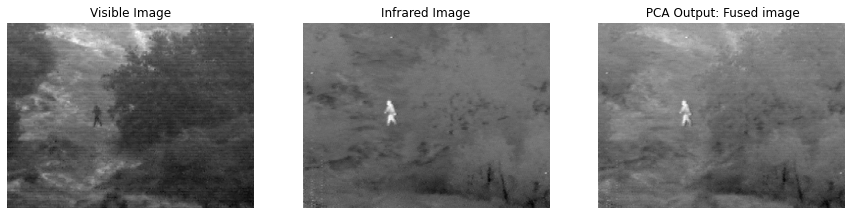

In [5]:
for id_x in range(1, 6, 1):

    gray_img = imread('IV_images/VIS%d.png' % id_x)
    ir_img = imread('IV_images/IR%d.png' % id_x)

    pic = Fusion_PCA(gray_img, ir_img)

    pict = pic * 255
    pict = pict.astype(np.uint8)
    
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 3, 1)
    plt.imshow(gray_img, 'gray')
    plt.axis('off')
    plt.title('Visible Image')

    plt.subplot(1, 3, 2)
    plt.imshow(ir_img, 'gray')
    plt.axis('off')
    plt.title('Infrared Image')

    plt.subplot(1, 3, 3)
    plt.imshow(pic, 'gray')
    plt.axis('off')
    plt.title(' PCA Output: Fused image')
    plt.show()

## Discrete Wavelet Transform


In [6]:

# Performs Image fusion using Discrete wavelet transform (DWT) with Daubechies filter
# input: two Images dataset (matrix) to be fused
# output: one Fused Image dataset (matrix)


def Fusion_DWT_db2(image1, image2):
    # decomposing each image using Discrete wavelet transform(DWT) with Daubechies filter (db2)
    coefficients_1 = pywt.wavedec2(image1, 'db2', level=2)
    coefficients_2 = pywt.wavedec2(image2, 'db2', level=2)
    # creating variables to be used
    coefficients_h = list(coefficients_1)
    # fusing the decomposed image data
    coefficients_h[0] = (coefficients_1[0] + coefficients_2[0]) * 0.5
    # creating variables to be used
    temp1 = list(coefficients_1[1])
    temp2 = list(coefficients_2[1])
    temp3 = list(coefficients_h[1])
    # fusing the decomposed image data
    temp3[0] = (temp1[0] + temp2[0]) * 0.5
    temp3[1] = (temp1[1] + temp2[1]) * 0.5
    temp3[2] = (temp1[2] + temp2[2]) * 0.5
    coefficients_h[1] = tuple(temp3)
    # Creating fused image by reconstructing the fused decomposed image
    result = pywt.waverec2(coefficients_h, 'db2')
    return result

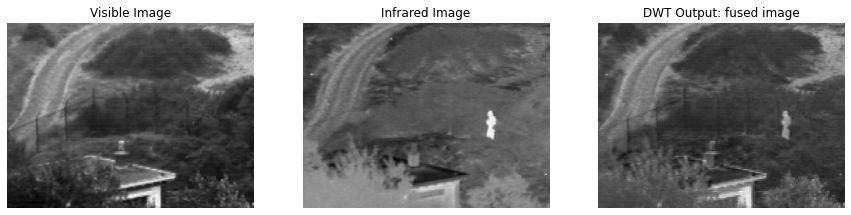

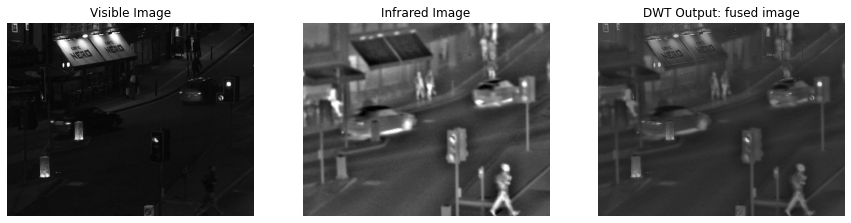

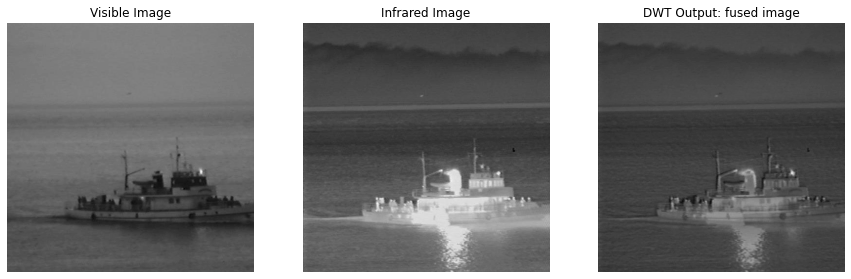

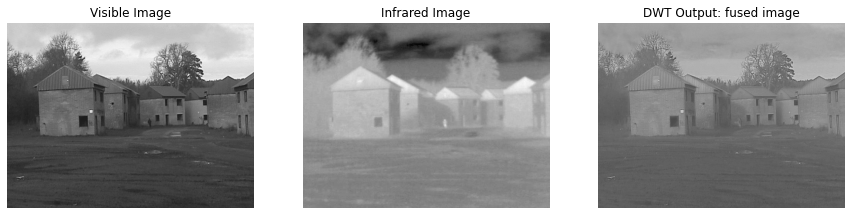

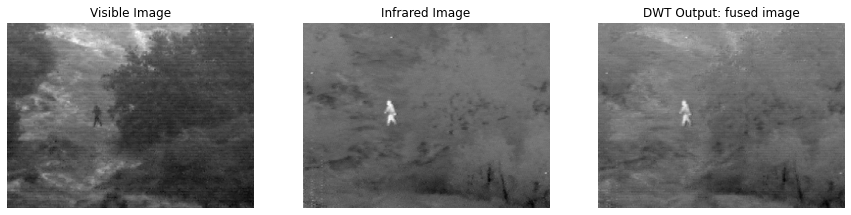

In [7]:
for id_x in range(1, 6, 1):

    gray_img = imread('IV_images/VIS%d.png' % id_x)
    ir_img = imread('IV_images/IR%d.png' % id_x)

    pic = Fusion_DWT_db2(gray_img, ir_img)

    pict = pic * 255
    pict = pict.astype(np.uint8)
    
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 3, 1)
    plt.imshow(gray_img, 'gray')
    plt.axis('off')
    plt.title('Visible Image')

    plt.subplot(1, 3, 2)
    plt.imshow(ir_img, 'gray')
    plt.axis('off')
    plt.title('Infrared Image')

    plt.subplot(1, 3, 3)
    plt.imshow(pic, 'gray')
    plt.axis('off')
    plt.title('DWT Output: fused image')
    plt.show()

## EVALUATION CRITERIA

#### 1]Root Mean Square Error(RMSE)

In [8]:
def RMSE(original, fusedimage):
         mse = np.mean((original - fusedimage) ** 2)
         return np.sqrt(mse)

In [9]:
gray_img = imread('IV_images/VIS5.png' )
ir_img = imread('IV_images/IR5.png' )
original=(img1+img2)/2
fimg=Fusion_DWT_db2(img1,img2)
fimg2=Fusion_PCA(img1,img2)

In [10]:
value1 = RMSE(original, fimg)
print(f"DWT: MSE value is {value1} ")
value1 = RMSE(original, fimg2)
print(f"PCA: MSE value is {value1} ")

DWT: MSE value is 15.641052365124102 
PCA: MSE value is 53.49376095832447 


#### 2]Peak Signal to Noise Ratio (PSNR)

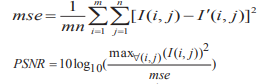

Peak Signal to Noise Ratio (PSNR) is a criteria for evaluation of the image quality after the image fusion. Invisibility of a fusion scheme can be described by PSNR. It is targeted to 40 dB

In [11]:
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 10 * log10(max_pixel**2 / sqrt(mse))
    return psnr

In [12]:
value1 = PSNR(original, fimg)
print(f"DWT: PSNR value is {value1} dB")
value1 = PSNR(original, fimg2)
print(f"PCA: PSNR value is {value1} dB")

DWT: PSNR value is 36.1881439085311 dB
PCA: PSNR value is 30.84777228180827 dB


#### 3]Normalized Correlation (NC)

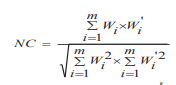

Normalized Correlation (NC) is used for comparison between the average of two images and the fused image. It reflects to a robustness of fusion scheme. NC is targeted to 1.0

In [13]:
def nc(logo,w):
    num = 0
    den1 = 0
    den2 = 0

    for i in range(len(w)):
        num += w[i]*logo[i]

    for i in range(len(logo)):
        den1 += logo[i]**2

    for i in range(len(w)):
        den2 += w[i]**2

    nc = num/(np.sqrt(den1*den2))
    return nc

In [22]:
value=nc(original,fimg)[0]
print("DWT: NC value is",value)
value=nc(original,fimg2)[0]
print("PCA: NC value is",value)

DWT: NC value is 0.9994608450231781
PCA: NC value is 0.9966420996678285
